In [1]:
import sys
sys.path.append('../')

%reload_ext autoreload
%autoreload 2

import Utility as ut
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

from matplotlib.lines import Line2D

from collections import Counter

np.random.seed(0)

In [2]:
cycleC = pd.read_csv("../Data/Chickens data/WithMacro/CycleC-Clean.csv")
cycleA = pd.read_csv("../Data/Chickens data/WithMacro/CycleA-Clean.csv")
cycleB = pd.read_csv("../Data/Chickens data/WithMacro/CycleB-Clean.csv")

In [7]:
cycleC=cycleC.rename(columns={"Date of Laid": "Date"})
cycleC.Date = pd.to_datetime(cycleC.Date, format = '%m/%d/%Y')
cycleA=cycleA.rename(columns={"Date of Laid": "Date"})
cycleA.Date = pd.to_datetime(cycleA.Date, format = '%m/%d/%Y')
cycleB=cycleB.rename(columns={"Date of Laid": "Date"})
cycleB.Date = pd.to_datetime(cycleB.Date, format = '%m/%d/%Y')

cycleC=cycleC.rename(columns={"Laied": "Laid"})
cycleA=cycleA.rename(columns={"Laied": "Laid"})
cycleB=cycleB.rename(columns={"Laied": "Laid"})

In [4]:
def compareDifferentCycles(dataSets, attribute):
    '''
    Function to compare two cycles attributes or more
    '''
    
    fig, ax = plt.subplots()
    ax.set_xlabel('Period')
    ax.set_ylabel(attribute)
    #Select to plot just years
    # ax.xaxis.set_major_locator(mpl.dates.DayLocator((1, 15)))
    # ax.xaxis.set_minor_locator(mpl.dates.MonthLocator((1,4,7,10)))
    # ax.xaxis.set_major_formatter(mpl.dates.DateFormatter("\n%d"))
    # ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%b"))
    fig.set_figwidth(20)
    
    legend = ['A', 'B', 'C']
    
    # apply min-max normalization
    # scaler = MinMaxScaler()
    # dataSets = pd.DataFrame(scaler.fit_transform(dataSets.values), columns=dataSets.columns, index=dataSets.index)
    
    for idx, dataSet in enumerate(dataSets):
        # remove columns with informations that could not be plot
        dataSet = dataSet.drop(columns=["Arrival Chickens Date","Date of Selling"])
        # choose only the enteresting attribute
        dataSet = dataSet[attribute]
        
        window = 14
        avarageData = []
        nparray = np.array(dataSet)
        for i in range(len(nparray) - window + 1):
            avarageData.append(np.mean(nparray[i:i+window]))
        dataSet = avarageData
        ax.plot(dataSet, label=legend[idx])
        
    
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
    plt.legend(legend)
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=31))

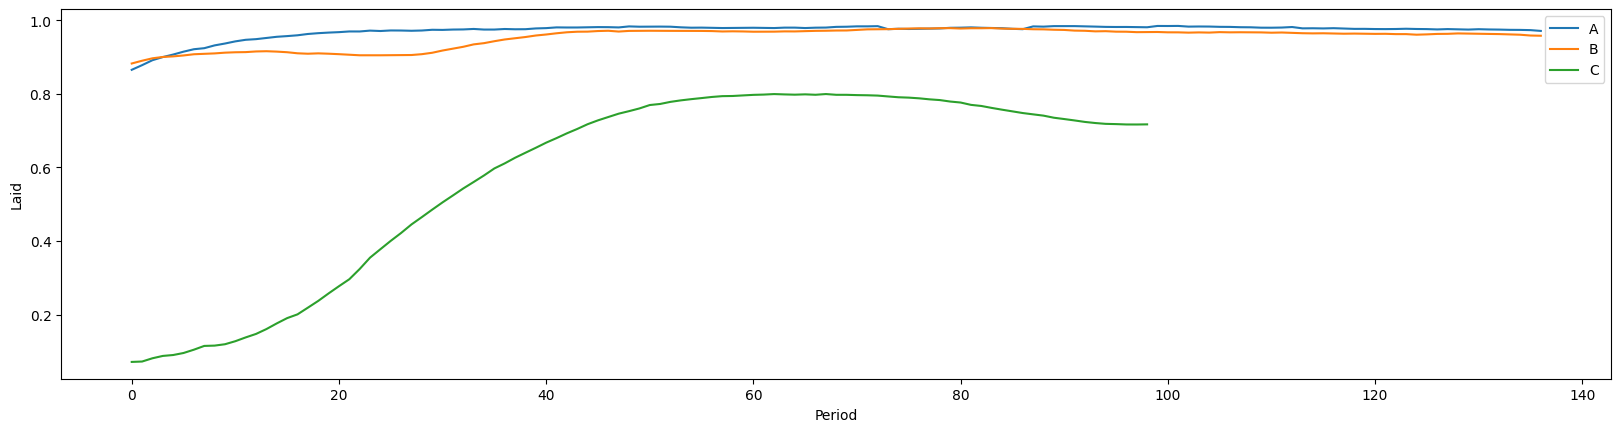

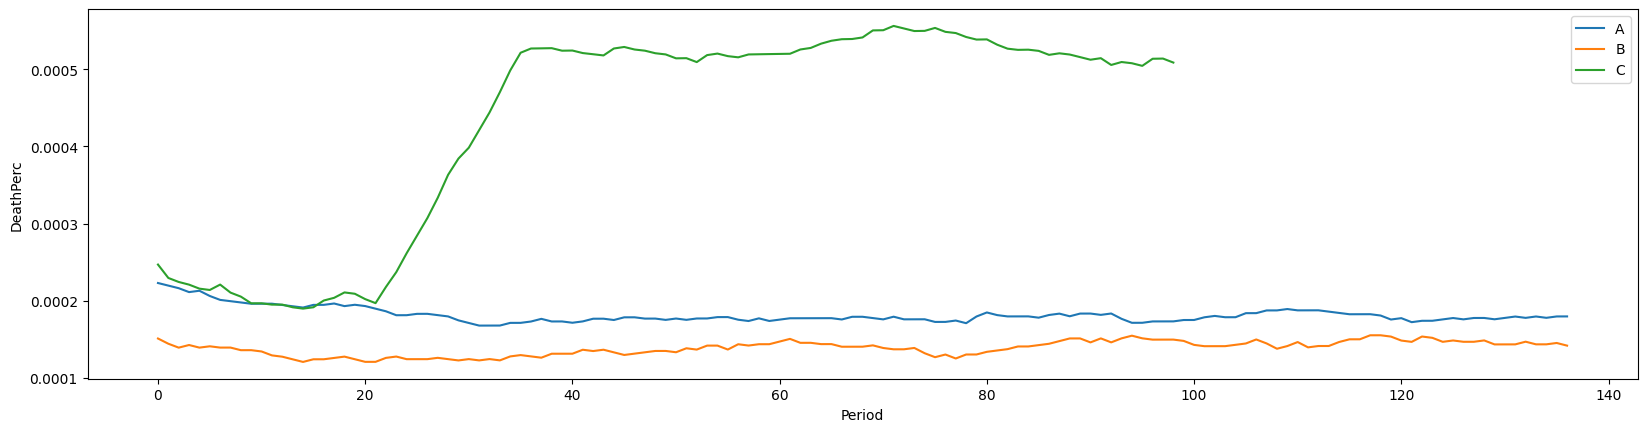

In [9]:
compareDifferentCycles([cycleA[:150], cycleB[:150], cycleC], "Laid")
compareDifferentCycles([cycleA[:150], cycleB[:150], cycleC], "DeathPerc")

In [10]:
deathA = cycleA["Death"][:400].sum()
deathB = cycleB["Death"][:400].sum()

In [11]:
deathA

4903

In [12]:
deathB

6369